In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# ds_name = "Bergamaschi"
# ds_name = "smarto"
ds_name = "support2"
# ds_name = "phpl04K8a"

In [50]:
df = pd.read_csv(f'results/{ds_name}_approximators_0.csv')

In [51]:
for i in range(1, 10):
    df = pd.concat([df, pd.read_csv(f'results/{ds_name}_approximators_{i}.csv')])

In [52]:
# Rename approximator labels for better readability
df['approximator'] = df['approximator'].replace({
    'montecarlo': 'Monte Carlo',
    'svarm': 'SVARM',
    'permutation': 'Permutation',
    'regression': 'Regression'
})

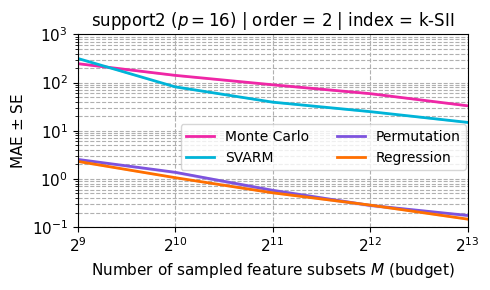

In [63]:
fig, ax = plt.subplots(figsize=(5, 3))
ax = sns.lineplot(
    df.loc[df.budget >= 2**6, :], 
    x="budget", 
    y="error", 
    hue="approximator", 
    errorbar="se", 
    # palette="Set2",
    palette=['#ef27a6', '#00b4d8', '#7d53de', '#ff6f00'],
    linewidth=2, 
    ax=ax
)
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=10)
ax.set_ylim(10**-1, 10**3)
ax.set_xlim(2**9, 2**13)
# ax.set_ylim(10**2, 10**5)
ax.set_xlabel("Number of sampled feature subsets $M$ (budget)", fontsize=11)
ax.set_ylabel("MAE $\pm$ SE", fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=11)
plt.grid(True, which="both", ls="--")
plt.title(f'{ds_name} ($p=16$) | order = 2 | index = k-SII')
# plt.legend(bbox_to_anchor=(0.63, 1.0), loc='upper center', ncol=2)
# plt.legend(bbox_to_anchor=(0.37, 0.29), loc='upper center', ncol=2)
plt.legend(bbox_to_anchor=(0.63, 0.57), loc='upper center', ncol=2)
plt.tight_layout()
plt.savefig(f'results/{ds_name}_approximators_benchmark.pdf', bbox_inches="tight", pad_inches=0.01)